In [1]:
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
#pip install openpyxl
import seaborn as sns

from imblearn.over_sampling import SMOTE


Bad key text.latex.preview in file c:\users\surya\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\users\surya\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\users\surya\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jp

In [3]:
df=pd.read_csv('ChatGPT_Reviews.csv')
df

,Review,Ratings
0,good,5
1,good,5
2,nice app,5
3,"nice, ig",5
4,"this is a great app, the bot is so accurate to...",5
...,...,...
257377,Update 2023,5
257378,its grear,5
257379,Funtastic App,5
257380,hi all,5


In [4]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [5]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()  # Safe conversion
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [6]:
df['Cleaned_Review'] = df['Review'].apply(clean_text)


In [7]:
df['Cleaned_Review']

0                                                      good
1                                                      good
2                                                  nice app
3                                                   nice ig
4         great app bot accurate anything gives tips gam...
                                ...                        
257377                                          update 2023
257378                                                grear
257379                                        funtastic app
257380                                                   hi
257381                                   expert application
Name: Cleaned_Review, Length: 257382, dtype: object

In [8]:
df['Ratings'].unique()

array([5, 4, 1, 3, 2], dtype=int64)

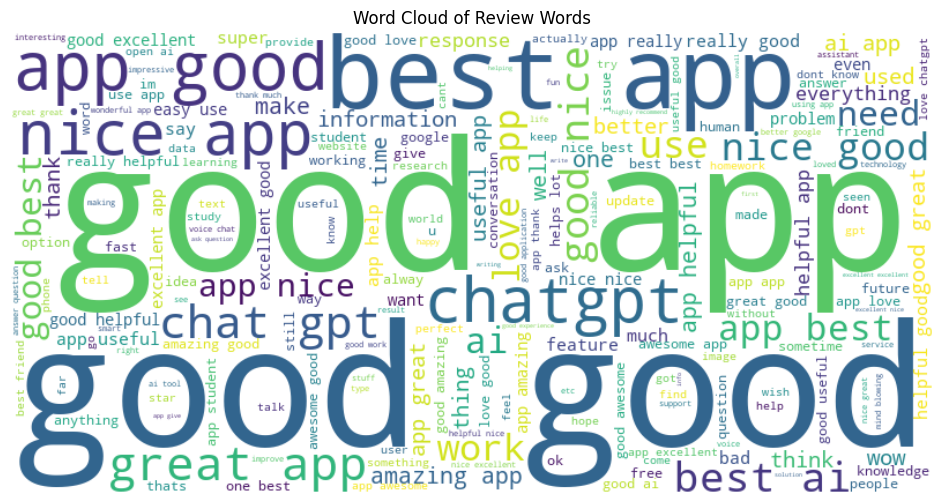

In [9]:
from wordcloud import WordCloud

# Generate word cloud
text = " ".join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Words')
plt.show()


In [10]:
# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Ratings']

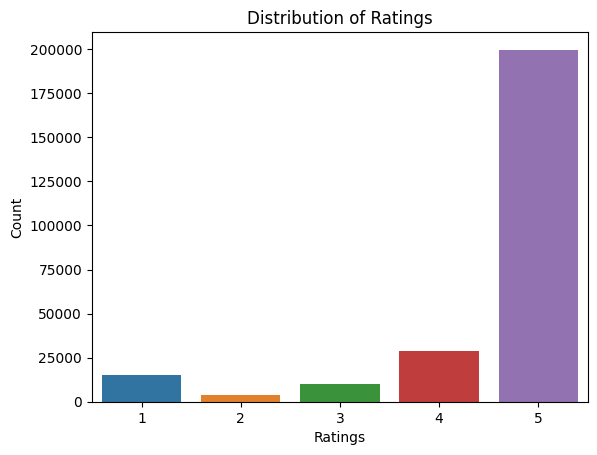

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count plot
sns.countplot(x=y)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

In [16]:
labels=['1','2','3','4','5']
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [17]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Model saved successfully.
DecisionTreeClassifier Accuracy    : 22.70917108611613
DecisionTreeClassifier Precision   : 26.21612273229756
DecisionTreeClassifier Recall      : 28.132267955943203
DecisionTreeClassifier FSCORE      : 14.261857729369359

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

           1       0.08      0.83      0.14      3051
           2       0.18      0.01      0.02       841
           3       0.13      0.03      0.05      2023
           4       0.15      0.24      0.19      5704
           5       0.87      0.19      0.32     39858

    accuracy                           0.23     51477
   macro avg       0.28      0.26      0.14     51477
weighted avg       0.71      0.23      0.28     51477



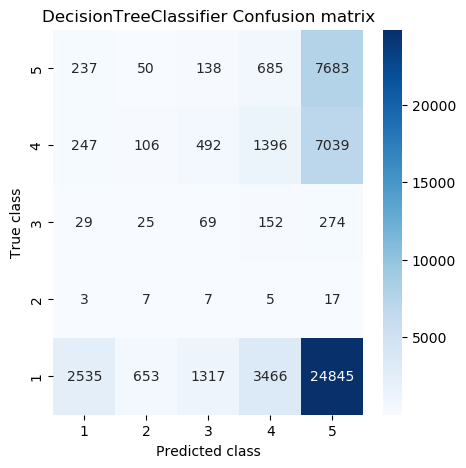

In [16]:
from sklearn.tree import DecisionTreeClassifier
import joblib
import os

if os.path.exists('model/DecisionTreeClassifier.pkl'):
    # Load the trained model from the file
    DTC = joblib.load('model/DecisionTreeClassifier.pkl')
    print("Model loaded successfully.")
    predict = DTC.predict(X_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    DTC = DecisionTreeClassifier(max_depth=4)
    DTC.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(DTC, 'model/DecisionTreeClassifier.pkl')
    print("Model saved successfully.")
    predict = DTC.predict(X_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)


Random Forest Model saved successfully.
Random Forest Accuracy    : 64.838665811916
Random Forest Precision   : 33.68673310682745
Random Forest Recall      : 36.16245397750597
Random Forest FSCORE      : 34.306409154085834

 Random Forest classification report
               precision    recall  f1-score   support

           1       0.50      0.43      0.46      3499
           2       0.16      0.09      0.12      1451
           3       0.13      0.14      0.13      1840
           4       0.27      0.16      0.20      9938
           5       0.75      0.86      0.80     34749

    accuracy                           0.65     51477
   macro avg       0.36      0.34      0.34     51477
weighted avg       0.60      0.65      0.62     51477



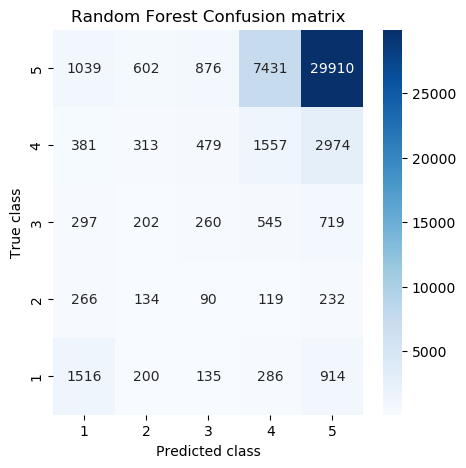

In [17]:
from sklearn.ensemble import RandomForestClassifier
import os
import joblib

# Create "model" folder if it doesn't exist
os.makedirs('model', exist_ok=True)

if os.path.exists('model/RandomForest.pkl'):
    # Load the trained model
    rf = joblib.load('model/RandomForest.pkl')
    print("Random Forest Model loaded successfully.")
    predict = rf.predict(X_test)
    calculateMetrics("Random Forest", y_test, predict)
else:
    # Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=16)
  # You can set n_estimators or other params if needed
    rf.fit(X_train, y_train)
    # Save the trained model
    joblib.dump(rf, 'model/RandomForest.pkl')
    print("Random Forest Model saved successfully.")
    predict = rf.predict(X_test)
    calculateMetrics("Random Forest", y_test, predict)


Extra Trees Classifier Model saved successfully.
Extra Trees Classifier Accuracy    : 48.143831225595896
Extra Trees Classifier Precision   : 30.57711817369612
Extra Trees Classifier Recall      : 36.782903839463586
Extra Trees Classifier FSCORE      : 28.804355122915876

 Extra Trees Classifier classification report
               precision    recall  f1-score   support

           1       0.53      0.38      0.44      4314
           2       0.32      0.03      0.05      9583
           3       0.30      0.08      0.12      7887
           4       0.16      0.16      0.16      5689
           5       0.54      0.89      0.67     24004

    accuracy                           0.48     51477
   macro avg       0.37      0.31      0.29     51477
weighted avg       0.42      0.48      0.39     51477



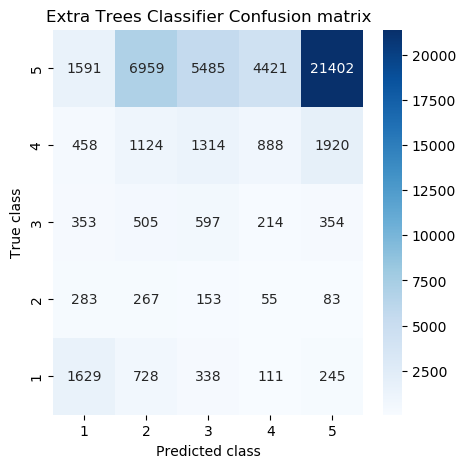

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import os
import joblib

# Create "model" folder if it doesn't exist
os.makedirs('model', exist_ok=True)

if os.path.exists('model/ExtraTrees.pkl'):
    # Load the trained model
    etc = joblib.load('model/ExtraTrees.pkl')
    print("Extra Trees Classifier Model loaded successfully.")
    predict = etc.predict(X_test)
    calculateMetrics("Extra Trees Classifier", y_test, predict)
else:
    # Train the model
    etc = ExtraTreesClassifier(n_estimators=100, random_state=42, max_depth=16)
    etc.fit(X_train, y_train)
    # Save the trained model
    joblib.dump(etc, 'model/ExtraTrees.pkl')
    print("Extra Trees Classifier Model saved successfully.")
    predict = etc.predict(X_test)
    calculateMetrics("Extra Trees Classifier", y_test, predict)

    

## Proposed NB

Naive Bayes Model saved successfully.
Naive Bayes Accuracy    : 54.66907550945083
Naive Bayes Precision   : 32.97932020318727
Naive Bayes Recall      : 42.639164868984025
Naive Bayes FSCORE      : 34.02640464636527

 Naive Bayes classification report
               precision    recall  f1-score   support

           1       0.61      0.37      0.46      5093
           2       0.31      0.09      0.14      2813
           3       0.24      0.13      0.17      3845
           4       0.38      0.16      0.22     13969
           5       0.59      0.91      0.71     25757

    accuracy                           0.55     51477
   macro avg       0.43      0.33      0.34     51477
weighted avg       0.49      0.55      0.48     51477



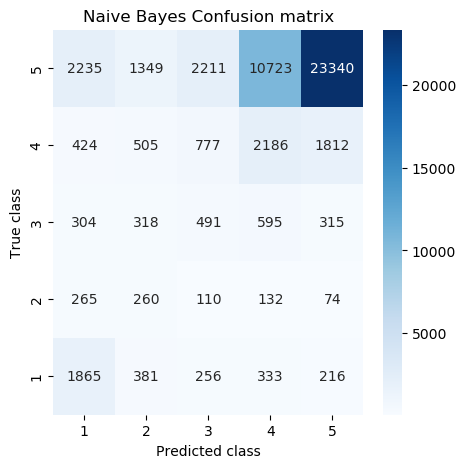

In [19]:
from sklearn.naive_bayes import MultinomialNB
import os
import joblib

# Create "model" folder if it doesn't exist
os.makedirs('model', exist_ok=True)

if os.path.exists('model/NaiveBayes.pkl'):
    # Load the trained model
    nb = joblib.load('model/NaiveBayes.pkl')
    print("Naive Bayes Model loaded successfully.")
    predict = nb.predict(X_test)
    calculateMetrics("Naive Bayes", y_test, predict)
else:
    # Train the model
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    # Save the trained model
    joblib.dump(nb, 'model/NaiveBayes.pkl')
    print("Naive Bayes Model saved successfully.")
    predict = nb.predict(X_test)
    calculateMetrics("Naive Bayes", y_test, predict)


In [15]:
from catboost import CatBoostClassifier
import os
import joblib

# Create "model" folder if it doesn't exist
os.makedirs('model', exist_ok=True)

if os.path.exists('model/CatBoost.pkl'):
    # Load the trained model
    cat = joblib.load('model/CatBoost.pkl')
    print("CatBoost Model loaded successfully.")
    predict = cat.predict(X_test)  # Convert sparse to dense
    calculateMetrics("CatBoost", y_test, predict)
else:
    # Train the model
    cat = CatBoostClassifier(verbose=0, random_state=42)
    cat.fit(X_train, y_train)  # Convert sparse to dense
    # Save the trained model
    joblib.dump(cat, 'model/CatBoost.pkl')
    print("CatBoost Model saved successfully.")
    predict = cat.predict(X_test.toarray())
    calculateMetrics("CatBoost", y_test, predict)


CatBoost Model loaded successfully.


NameError: name 'calculateMetrics' is not defined